In [4]:
# pip install opencv-python

In [31]:
import pandas as pd
from PIL import Image
import numpy as np
import glob
import cv2

In [32]:
artists = pd.read_csv("../Data/artists.csv")
artists.head()

,id,name,years,genre,nationality,bio,wikipedia,paintings
0,0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian,Amedeo Clemente Modigliani (Italian pronunciat...,http://en.wikipedia.org/wiki/Amedeo_Modigliani,193
1,1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian,Wassily Wassilyevich Kandinsky (Russian: Васи́...,http://en.wikipedia.org/wiki/Wassily_Kandinsky,88
2,2,Diego Rivera,1886 - 1957,"Social Realism,Muralism",Mexican,Diego María de la Concepción Juan Nepomuceno E...,http://en.wikipedia.org/wiki/Diego_Rivera,70
3,3,Claude Monet,1840 - 1926,Impressionism,French,Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 ...,http://en.wikipedia.org/wiki/Claude_Monet,73
4,4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian,René François Ghislain Magritte (French: [ʁəne...,http://en.wikipedia.org/wiki/René_Magritte,194


In [33]:
artists.iloc[:,1]

0             Amedeo Modigliani
1            Vasiliy Kandinskiy
2                  Diego Rivera
3                  Claude Monet
4                 Rene Magritte
5                 Salvador Dali
6                 Edouard Manet
7                 Andrei Rublev
8              Vincent van Gogh
9                  Gustav Klimt
10             Hieronymus Bosch
11             Kazimir Malevich
12               Mikhail Vrubel
13                Pablo Picasso
14            Peter Paul Rubens
15        Pierre-Auguste Renoir
16               Francisco Goya
17                  Frida Kahlo
18                     El Greco
19               Albrecht Dürer
20                Alfred Sisley
21               Pieter Bruegel
22                 Marc Chagall
23            Giotto di Bondone
24            Sandro Botticelli
25                   Caravaggio
26            Leonardo da Vinci
27              Diego Velazquez
28                Henri Matisse
29                 Jan van Eyck
30                  Edgar Degas
31      

In [34]:
artists.drop(labels=['id','bio','genre','wikipedia'], axis=1, inplace=True)
artists.head()

,name,years,nationality,paintings
0,Amedeo Modigliani,1884 - 1920,Italian,193
1,Vasiliy Kandinskiy,1866 - 1944,Russian,88
2,Diego Rivera,1886 - 1957,Mexican,70
3,Claude Monet,1840 - 1926,French,73
4,Rene Magritte,1898 - 1967,Belgian,194


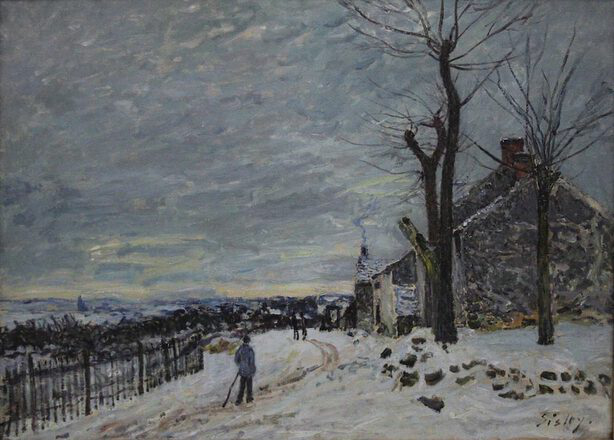

In [35]:
img = Image.open("../Data/resized/Alfred_Sisley_1.jpg")
img

In [7]:
np.array(img).shape

(440, 614, 3)

In [8]:
np.array(img).shape[1]

614

In [9]:
widthRatio = []
heightRatio = []

for file in sorted(glob.glob('../Data/resized/*.jpg')):
    img = np.array(Image.open(file), dtype=np.int32)
    #print(img.shape[1])
    widthRatio.append(img.shape[1])
    heightRatio.append(img.shape[0])

In [10]:
print('art의 너비 최대 해상도 :', np.max(widthRatio))
print('art의 높이 최대 해상도 :', np.max(heightRatio))

print('art의 너비 최소 해상도 :', np.min(widthRatio))
print('art의 높이 최소 해상도 :', np.min(heightRatio))

art의 너비 최대 해상도 : 2458
art의 높이 최대 해상도 : 2296
art의 너비 최소 해상도 : 122
art의 높이 최소 해상도 : 136


In [11]:
len(widthRatio)

8683

In [12]:
number_of_data = 8027   # art의 갯수
img_width_size = 2458   # artd의 너비
img_height_size = 2296  # art의 높이

In [13]:
artData = np.zeros(number_of_data*img_width_size*img_height_size,dtype=np.int32).reshape(number_of_data,img_height_size,img_width_size)

In [14]:
artData.shape

(8027, 2296, 2458)

In [15]:
# 영상의 크기는 2458 * 2296, 이보다 작은 영상은 센터로 이동
def centerImage(src, dx, dy):
    mtrx = np.float32([[1,0,dx],[0,1,dy]])
    return cv2.warpAffine(src, mtrx, (2458, 2296)) # w,h

In [16]:
# art 영상 그레이스케일 변환 및 중심이동
i = 0
for file in sorted(glob.glob("../Data/resized/*.jpg")):
    img = cv2.imread(file, cv2.IMREAD_COLOR)
    

    saveFile = "../Data/art_re"+file.replace("../Data/resized/",'')
    img2 = centerImage(
        img,
        np.floor((2458-img.shape[1])/2),
        np.floor((2296-img.shape[0])/2)
    )
    i += 1
    cv2.imwrite(saveFile, img2)

[ WARN:0@684.271] global /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../Data/resized/Andrei_Rublev_80.jpg'): can't open/read file: check file path/integrity


AttributeError: 'NoneType' object has no attribute 'shape'